# MOF ChemUnity Property Extraction

This notebook demonstrates how the property extraction in MOF ChemUnity is used. You need to have the MOF name that you want to extract properties for which is obtained from the Matching workflow.

In [16]:
from src.MOF_ChemUnity.Agents.ExtractionAgent import ExtractionAgent
from src.MOF_ChemUnity.utils.DataPrep import Data_Prep
from src.MOF_ChemUnity.Extraction_Prompts import VERIFICATION, RECHECK, EXTRACTION
from src.MOF_ChemUnity.Water_Stability_Prompts import WATER_STABILITY, RULES_WATER_STABILITY, VERF_RULES_WATER_STABILITY, WATER_STABILITY_RE

### Preparation of MOF Names from Matching CSV

we need to read the matching csv file and extract the file names from within that.

In [17]:
import pandas as pd
import glob
import os

In [18]:
mof_names_df = pd.read_csv("./tests/general_extraction_benchmark/matching_benchmark_output.csv")
mof_names_df.head()

,MOF Name,CSD Ref Code,Justification,DOI
0,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,"The MOF [Cu3(TP)4(N3)2(DMF)2]·3C6H12, referred...",10.1021/ic5008457
1,[Cu3(TP)4(N3)2(DMF)2]·2C5H10<|>1b,QONLAI,"The MOF [Cu3(TP)4(N3)2(DMF)2]·2C5H10, referred...",10.1021/ic5008457
2,[Cu3(TP)4(N3)2(DMF)2]·H2O·C10H18<|>1c,QONLEM,"The MOF [Cu3(TP)4(N3)2(DMF)2]·H2O·C10H18, refe...",10.1021/ic5008457
3,[Cu3(TP)4(N3)2(DMF)2]·C4H8O2<|>1d,QONLIQ,"The MOF [Cu3(TP)4(N3)2(DMF)2]·C4H8O2, referred...",10.1021/ic5008457
4,[Cu3(TP)4(N3)2]·3C4H8O2<|>1e,QOMRUH,"The MOF [Cu3(TP)4(N3)2]·3C4H8O2, referred to a...",10.1021/ic5008457


In [19]:
paper_doi = pd.read_csv("tests/general_extraction_benchmark/Ground Truth DOIs.csv")[["DOI", "Paper Number"]]
paper_doi.head()

,DOI,Paper Number
0,10.1039/c3ce40346g,1
1,10.1039/c3ce40346g,1
2,10.1039/c3ce40346g,1
3,10.1021/ja200978u,2
4,10.1021/ja200978u,2


In [20]:
paper_doi = paper_doi.groupby("DOI").min().reset_index()

In [21]:
mof_names_df["Paper Number"] = mof_names_df["DOI"].apply(lambda x: paper_doi["Paper Number"][paper_doi["DOI"]==x].iloc[0])
mof_names_df.head()

,MOF Name,CSD Ref Code,Justification,DOI,Paper Number
0,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,"The MOF [Cu3(TP)4(N3)2(DMF)2]·3C6H12, referred...",10.1021/ic5008457,21
1,[Cu3(TP)4(N3)2(DMF)2]·2C5H10<|>1b,QONLAI,"The MOF [Cu3(TP)4(N3)2(DMF)2]·2C5H10, referred...",10.1021/ic5008457,21
2,[Cu3(TP)4(N3)2(DMF)2]·H2O·C10H18<|>1c,QONLEM,"The MOF [Cu3(TP)4(N3)2(DMF)2]·H2O·C10H18, refe...",10.1021/ic5008457,21
3,[Cu3(TP)4(N3)2(DMF)2]·C4H8O2<|>1d,QONLIQ,"The MOF [Cu3(TP)4(N3)2(DMF)2]·C4H8O2, referred...",10.1021/ic5008457,21
4,[Cu3(TP)4(N3)2]·3C4H8O2<|>1e,QOMRUH,"The MOF [Cu3(TP)4(N3)2]·3C4H8O2, referred to a...",10.1021/ic5008457,21


### Markdown files setup

In [22]:
input_folder = "./tests/general_extraction_benchmark/markdown"


files = glob.glob(input_folder+"/*/*.md")

In [23]:
mof_names_df["Reference"] = [input_folder+f"/{i}/{i}.md" for i in list(mof_names_df["Paper Number"])]
mof_names_df.head()

,MOF Name,CSD Ref Code,Justification,DOI,Paper Number,Reference
0,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,"The MOF [Cu3(TP)4(N3)2(DMF)2]·3C6H12, referred...",10.1021/ic5008457,21,./tests/general_extraction_benchmark/markdown/...
1,[Cu3(TP)4(N3)2(DMF)2]·2C5H10<|>1b,QONLAI,"The MOF [Cu3(TP)4(N3)2(DMF)2]·2C5H10, referred...",10.1021/ic5008457,21,./tests/general_extraction_benchmark/markdown/...
2,[Cu3(TP)4(N3)2(DMF)2]·H2O·C10H18<|>1c,QONLEM,"The MOF [Cu3(TP)4(N3)2(DMF)2]·H2O·C10H18, refe...",10.1021/ic5008457,21,./tests/general_extraction_benchmark/markdown/...
3,[Cu3(TP)4(N3)2(DMF)2]·C4H8O2<|>1d,QONLIQ,"The MOF [Cu3(TP)4(N3)2(DMF)2]·C4H8O2, referred...",10.1021/ic5008457,21,./tests/general_extraction_benchmark/markdown/...
4,[Cu3(TP)4(N3)2]·3C4H8O2<|>1e,QOMRUH,"The MOF [Cu3(TP)4(N3)2]·3C4H8O2, referred to a...",10.1021/ic5008457,21,./tests/general_extraction_benchmark/markdown/...


### Running the Extraction Loop for General Property Extraction + CoV

In [24]:
with open(".apikeys", 'r') as f:
    os.environ["OPENAI_API_KEY"] = f.read()

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0.1)
parser_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [25]:
result = {}
result["MOF Name"] = []
result["Ref Code"] = []
result["Property"] = []
result["Value"] = []
result["Units"] = []
result["Condition"] = []
result["Summary"] = []
result["Reference"] = []

In [26]:
filtered_result = {}
filtered_result["MOF Name"] = []
filtered_result["Ref Code"] = []
filtered_result["Property"] = []
filtered_result["Value"] = []
filtered_result["Units"] = []
filtered_result["Condition"] = []
filtered_result["Summary"] = []
filtered_result["Reference"] = []

In [27]:
agent = ExtractionAgent(llm=llm, parser_llm=parser_llm)

In [28]:
for i in range(len(mof_names_df)):

    mof = mof_names_df.iloc[i]["MOF Name"]
    refcode = mof_names_df.iloc[i]["CSD Ref Code"]
    reference = mof_names_df.iloc[i]["DOI"]
    
    response = agent.agent_response(mof, mof_names_df.iloc[i]["Reference"],
                                    EXTRACTION, CoV=False, fuzz_threshold=85, store_vs=True)
    
    general_extraction = response

    filtered = general_extraction[0]
    all_props = general_extraction[1]

    print(filtered)
    print(all_props)

    for j in filtered:
        filtered_result["MOF Name"].append(mof)
        filtered_result["Ref Code"].append(refcode)
        filtered_result["Reference"].append(reference)
        filtered_result["Property"].append(j.name)
        filtered_result["Units"].append(j.units)
        filtered_result["Value"].append(j.value)
        filtered_result["Condition"].append(j.condition)
        filtered_result["Summary"].append(j.summary)
    for j in all_props.properties:
        result["MOF Name"].append(mof)
        result["Ref Code"].append(refcode)
        result["Reference"].append(reference)
        result["Property"].append(j.name)
        result["Units"].append(j.units)
        result["Value"].append(j.value)
        result["Condition"].append(j.condition)
        result["Summary"].append(j.summary)


all_props = pd.DataFrame(result)
filtered = pd.DataFrame(filtered_result)

Saved vector store for ./tests/general_extraction_benchmark/markdown/21/21.md in ./tests/general_extraction_benchmark/markdown/vs/21
Action: reading the document
finding all properties of name 1: [Cu3(TP)4(N3)2(DMF)2]·3C6H12 ---name 2: 1a

Result: 
1.  -Property Name: Space Group
    -Property Value: P21/n
    -Value Units: N/A
    -Conditions: Single-crystal X-ray analysis
    -Summary: "Single-crystal X-ray analysis reveals that 1a still maintains the original monoclinic space group P21/n (Supporting Information Table S1)."

2.  -Property Name: Cell Volume Expansion
    -Property Value: 3.74
    -Value Units: %
    -Conditions: After solvent exchange with cyclohexane
    -Summary: "There is only a little expansion of a, b, and c axes (Δa = 0.96%, Δb = 1.89%, and Δc = 1.02%), which consequently results in a small expansion of the cell volume (ΔV = 3.74%) (Supporting Information Table S11)."

3.  -Property Name: Square Window Size
    -Property Value: 13.261 × 21.697
    -Value Units: 

In [29]:
all_props.to_csv("/mnt/c/Users/Amro/Desktop/all.csv")
filtered.to_csv("/mnt/c/Users/Amro/Desktop/fil.csv")

## Performance Metrics

### Filter Performance

In [81]:
filtered = pd.read_csv("./tests/general_extraction_benchmark/results/fil.csv")
all_props = pd.read_csv("./tests/general_extraction_benchmark/results/all.csv")

In [82]:
len(all_props)

1287

In [83]:
all_props.head()

,Unnamed: 0,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
0,0,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,space group,P21/n,NaN,Single-crystal X-ray analysis,Single-crystal X-ray analysis reveals that 1a ...,10.1021/ic5008457
1,1,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,Cell Volume Expansion,3.74,%,After solvent exchange with cyclohexane,"There is only a little expansion of a, b, and ...",10.1021/ic5008457
2,2,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,Square Window Size,13.261 × 21.697,Å,After solvent exchange with cyclohexane,"However, the sizes of the square windows have ...",10.1021/ic5008457
3,3,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,Cu···O(DMF) Interaction Distance,2.853,Å,After solvent exchange with cyclohexane,"In addition, the separations of the weak Cu···...",10.1021/ic5008457
4,4,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,Stability,Stable for several months,NaN,Atmospheric conditions,Compounds 1−1g are stable in atmospheric condi...,10.1021/ic5008457


In [84]:
all_props[["Ref Code", "Property"]].groupby("Property").count().rename({"Ref Code": "Counts"},axis=1).sort_values("Counts", ascending=False).reset_index()

,Property,Counts
0,space group,86
1,crystal system,69
2,cell volume,38
3,thermal stability,36
4,Yield,36
...,...,...
522,IR ν(C–O),1
523,IR ν(CN),1
524,IR ν(CH–Ar),1
525,IR ν(CC),1


In [85]:
len(filtered)

338

In [86]:
filtered.head()

,Unnamed: 0,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
0,0,[Cu3(TP)4(N3)2(DMF)2]·3C6H12<|>1a,QONKUB,space group,P21/n,NaN,Single-crystal X-ray analysis,Single-crystal X-ray analysis reveals that 1a ...,10.1021/ic5008457
1,1,[Cu3(TP)4(N3)2(DMF)2]·2C5H10<|>1b,QONLAI,space group,P21/n,NaN,Single-crystal X-ray analysis,Single-crystal X-ray analysis shows that 1b an...,10.1021/ic5008457
2,2,[Cu3(TP)4(N3)2(DMF)2]·H2O·C10H18<|>1c,QONLEM,space group,P21/n,NaN,Single-crystal X-ray analysis,Single-crystal X-ray analysis shows that 1b an...,10.1021/ic5008457
3,3,[Cu3(TP)4(N3)2(DMF)2]·C4H8O2<|>1d,QONLIQ,space group,P21/n,NaN,Single-crystal X-ray analysis,Single-crystal X-ray analysis indicates that 1...,10.1021/ic5008457
4,4,[Cu3(TP)4(N3)2]·3C4H8O2<|>1e,QOMRUH,space group,P21/n,NaN,NaN,Compound 1e also crystallizes in the monoclini...,10.1021/ic5008457


In [87]:
filtered[["Ref Code", "Property"]].groupby("Property").count().rename({"Ref Code": "Counts"},axis=1).sort_values("Counts", ascending=False).reset_index()

,Property,Counts
0,space group,86
1,crystal system,69
2,cell volume,38
3,thermal stability,36
4,density,29
5,chemical formula,20
6,surface area,18
7,topology,13
8,porosity,9
9,magnetic susceptibility,8


In [88]:
print(48*"*")
print(f"Number of Entries:\t{len(all_props)} ---> {len(filtered)}")
print(f"Reduction Percent:\t{len(filtered)/len(all_props):0.1%}\n")

print(f"Number of Properties:\t{len(all_props['Property'].unique())} ---> {len(filtered['Property'].unique())}")
print(f"Property Dropout:\t{len(filtered['Property'].unique())/len(all_props['Property'].unique()):0.1%}\n")
print(48*"*")

************************************************
Number of Entries:	1287 ---> 338
Reduction Percent:	26.3%

Number of Properties:	527 ---> 13
Property Dropout:	2.5%

************************************************


<Axes: xlabel='Property'>

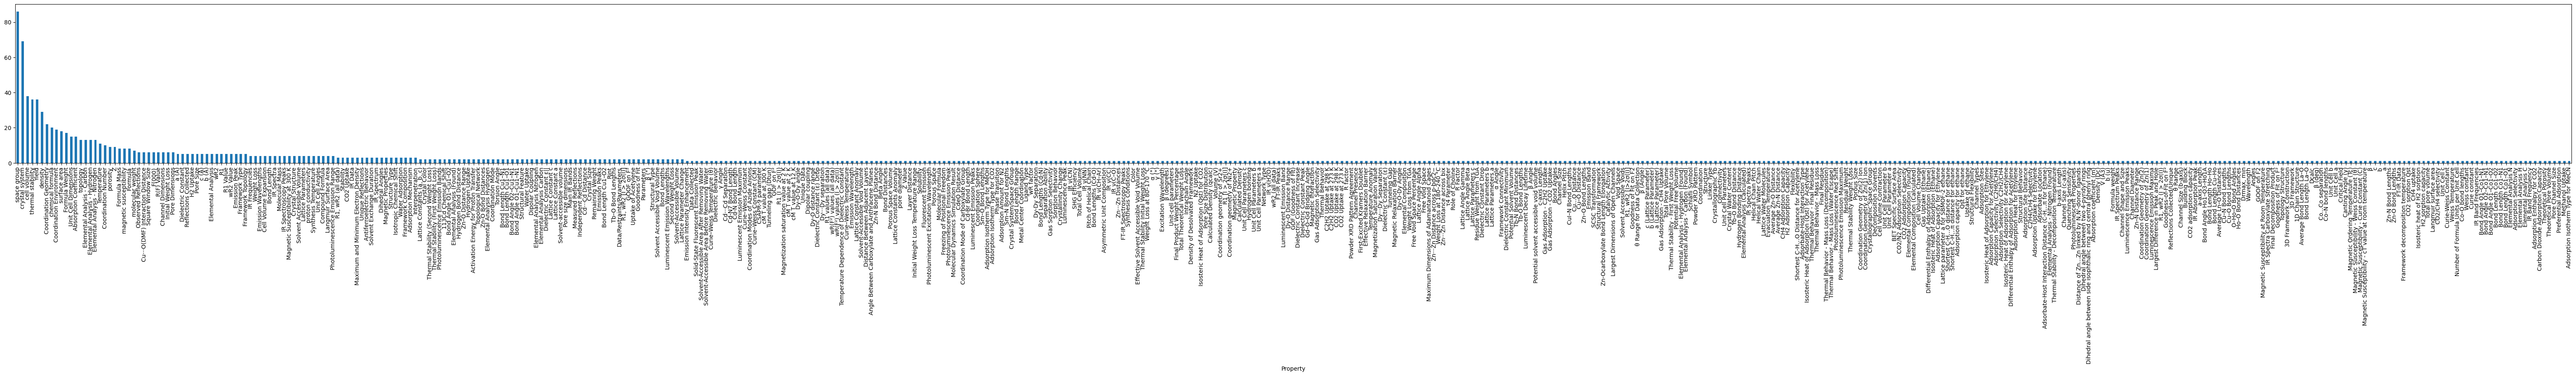

In [89]:
all_props["Property"].value_counts().plot(kind="bar", figsize=(80,5))

<Axes: xlabel='Property'>

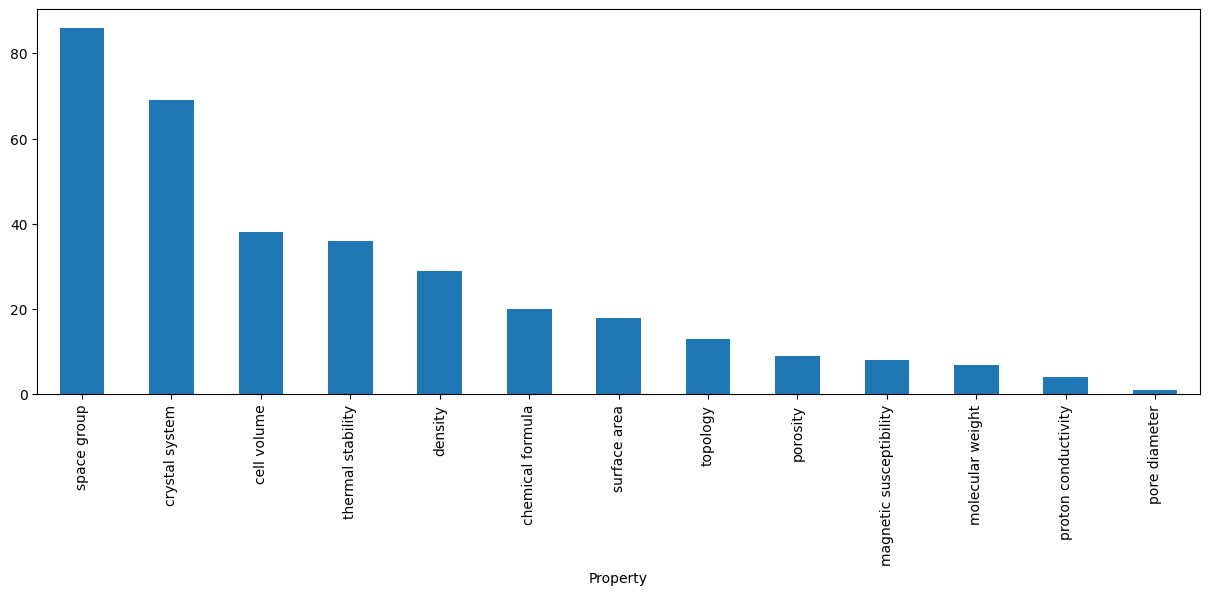

In [90]:
filtered["Property"].value_counts().plot(kind="bar", figsize=(15,5))

### Extraction Performance

In [112]:
from thefuzz import fuzz

In [107]:
ground_truth = pd.read_csv("./tests/general_extraction_benchmark/general_extraction_benchmark.csv")
ground_truth.head()

,DOI,Paper Number,MOF NAME,Property,Value,Units
0,10.1039/c3ce40346g,1,[EuCu(tda)(ina)2(H2O)]?3H2O <|> 1,Space Group,P1,NaN
1,10.1039/c3ce40346g,1,[EuCu(tda)(ina)2(H2O)]?3H2O <|> 1,Decomposition Temperature,300,uC
2,10.1039/c3ce40346g,1,[EuCu(tda)(ina)2(H2O)]?3H2O <|> 1,Topology,"{4^8 - 6^2}{4^8 - 6^6 - 8}<|>AKA (5,6)-connected",NaN
3,10.1039/c3ce40346g,1,[EuCu(tda)(ina)2(H2O)]?3H2O <|> 1,Linker,Hina & H3tda,NaN
4,10.1039/c3ce40346g,1,[TbCu(tda)(ina)2(H2O)]?3H2O <|> 2,Space Group,P1,NaN


In [108]:
PROPERTY_NAME_MAPPING = {
    "density": ["density", "ρ", "ρcalc", "ρ/g·cm-3"],
    "cell volume": ["cell volume", "unit cell volume", "volume"],
    "thermal stability": ["decomposition temperature", "thermal stability"]
}

In [109]:
ground_truth["DOI"] = ground_truth["DOI"].apply(lambda x: x.strip().lower())
filtered_20 = filtered[filtered["Reference"].apply(lambda x: x.lower() in list(ground_truth["DOI"]))]
filtered_20.head()

,Unnamed: 0,MOF Name,Ref Code,Property,Value,Units,Condition,Summary,Reference
40,40,{Zn(L1)(H2O)(SO4)0.5-(H2O)0.5}n<|>compound 1,KOCWIJ,space group,P212121,NaN,NaN,The compound 1 crystallized in the chiral spac...,10.1016/j.inoche.2007.12.038
68,68,[Yb2(BDC)3(DMF)2]·H2O<|>(1),not provided,crystal system,Monoclinic,NaN,NaN,[Yb2IJBDC)3IJDMF)2]·H2O (1) crystallises from ...,10.1039/C7CE00481H
69,69,[Yb2(BDC)3(DMF)2]·H2O<|>(1),not provided,cell volume,3384.96,Å3,At 100 K,Table 1 shows selected crystallographic data f...,10.1039/C7CE00481H
70,70,[Yb2(BDC)3(DMF)2]·H2O<|>(1),not provided,space group,C2/c,NaN,NaN,Yb2IJBDC)3IJDMF)2IJH2O)2 (2) was also prepared...,10.1039/C7CE00481H
71,71,[Yb2(BDC)3(DMF)2]·H2O<|>(1),not provided,surface area,305,m2 g−1,After calcination at 300 °C,"Interestingly, Yb2IJBDC)3 shows porosity, Fig....",10.1039/C7CE00481H


In [122]:
for mof in list(filtered_20["MOF Name"].unique()):
    extracted_props = filtered_20[filtered_20["MOF Name"] == mof]

    true_props = ground_truth[ground_truth["DOI"] == extracted_props.iloc[0]["Reference"]]
    
    extracted_props = {row["Property"]: row["Value"] for _, row in extracted_props.iterrows()}

    print(mof)
    print(extracted_props)

    true_props.to_csv("./preview.csv")

    input()

{Zn(L1)(H2O)(SO4)0.5-(H2O)0.5}n<|>compound 1
{'space group': 'P212121'}
[Yb2(BDC)3(DMF)2]·H2O<|>(1)
{'crystal system': 'Monoclinic', 'cell volume': '3384.96', 'space group': 'C2/c', 'surface area': '305', 'topology': 'sra'}
Yb2(BDC)3(DMF)2(H2O)2<|>(2)
{'crystal system': 'Triclinic', 'space group': 'P¯1', 'surface area': '376', 'topology': 'peu'}
{[Cd(HBTC)(H2O)]-(p-bix)1/2(H2O)2}n<|>complex 2
{'density': '1.837', 'crystal system': 'Monoclinic', 'space group': 'P2(1)/c', 'molecular weight': '493.72', 'thermal stability': '11.1'}
[Cd3(BTC)2(m-bix)3]n4nH2O<|>complex 1
{'density': '1.649', 'crystal system': 'Monoclinic', 'space group': 'P2(1)/c', 'molecular weight': '1538.37', 'thermal stability': 'Decomposition begins after loss of water'}
[Zn3(BTC)2(p-bix)3(H2O)2]n4nH2O<|>complex 3
{'density': '1.566', 'crystal system': 'Monoclinic', 'cell volume': '3022.6', 'space group': 'P2(1)/c'}
[Cu2(OH)(TZI)(H2O)2]n 3nH2O<|>compound 1
{'density': '1.984', 'crystal system': 'Monoclinic', 'cell volum

In [124]:
16/20

0.8